In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.optimize import curve_fit
import sys

sys.path.append(r'C:\Users\shadd\OneDrive\Documents\Python\fr_XAS\ImpedanceAnalyzer')

from application import ECfit

In [3]:
path=r'G:\My Drive\UW Research\fr-XAS Feb 2018'
fHead='\EIS OCV.csv'

filestr=str(path+fHead)

data=pd.read_csv(filestr,header=None)
data.drop([3,4,5,6,7,8,9,10],axis=1,inplace=True)
data.dropna(inplace=True)
data.columns=('freq','Zre','-Zim')

Zre=np.array(data['Zre'])
Zim=np.array(data['-Zim'])*-1
Freq=np.array(data['freq'])

threshold=62
Freq=Freq[Zre>threshold]
Zim=Zim[Zre>threshold]
Zre=Zre[Zre>threshold]


In [4]:
fitDat=np.array([Freq,Zre,Zim])
# fitDat=np.delete(fitDat,20,axis=1)
fitDat=fitDat.T.tolist()
init_gues=[65,45,.00062,.923]

fitparams,fit_err,fit=ECfit.fitEC.equivalent_circuit(fitDat,'R-p((R,E/))',init_gues)

fitarr=np.array(fit).T

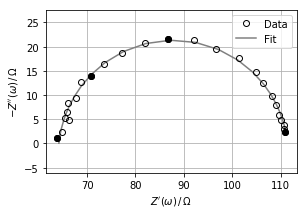

In [5]:
size=(4.5,3)

font = mpl.font_manager.FontProperties(family='Verdana',
                                   weight='normal',
                                   style='normal', size='medium')

fig3, f3_ax1=plt.subplots(ncols=1,nrows=1,figsize=size)

f3_ax1.plot(Zre[16:],Zim[16:]*-1,'ko',fillstyle='none',label='Data',zorder=3)
f3_ax1.plot(fitarr[1,:],fitarr[2,:]*-1,'-',color='0.5',label='Fit',zorder=2)

plt.axis('equal')


f3_ax1.grid()
f3_ax1.set_xlabel(r'$Z^{\prime}(\omega)\/ / \/ \Omega$')
f3_ax1.set_ylabel(r'$-Z^{\prime\prime}(\omega)\/ / \/ \Omega$')
f3_ax1.legend(prop=font)
f3_ax1.plot(Zre[16],Zim[16]*-1,'ko')
f3_ax1.plot(Zre[24],Zim[24]*-1,'ko')
f3_ax1.plot(Zre[28],Zim[28]*-1,'ko')
f3_ax1.plot(Zre[-1],Zim[-1]*-1,'ko')

# plt.show()
# plt.savefig('EIS OCV 700C 1% O2.png', bbox_inches='tight',dpi=1000)

In [116]:
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [35]:
np.argwhere(Zre>62)

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42]], dtype=int64)

In [55]:
dum1=Zre[Zre>62]
dum2=Zim[Zre>62]
print(dum1,dum2)

[ 65.4709  63.611   63.7861  66.0164  64.582   62.6772  63.0678  64.5946
  64.5605  63.4809  62.9663  63.9667  65.9473  63.7025  65.0815  63.5399
  63.8762  64.8567  66.27    65.3898  65.9575  66.1057  67.7904  68.7933
  70.8187  73.5937  77.2587  81.9687  86.6867  92.1759  96.6596 101.353
 104.873  106.43   108.253  109.058  109.655  110.019  110.618  110.78
 110.97  ] [ -0.38999   -1.30826    0.49221   -1.16411    1.23554   -2.49789
   1.25886   -1.84969    3.15673   -1.66103   -0.520317  -1.31917
  -0.921101  -1.78172   -2.11232   -4.55865   -1.04841   -2.25198
  -4.8155    -5.1409    -6.4717    -8.39838   -9.34064  -12.5848
 -14.0151   -16.3048   -18.6082   -20.6572   -21.4989   -21.3385
 -19.3899   -17.685    -14.7349   -12.4457    -9.82888   -7.82908
  -5.82878   -4.7269    -3.74065   -2.89222   -2.34586 ]


In [47]:
np.delete(Zre,Zre>60)

C:\Users\shadd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: in the future insert will treat boolean arrays and array-likes as boolean index instead of casting it to integer
  """Entry point for launching an IPython kernel.


array([ 63.7861,  66.0164,  64.582 ,  62.6772,  63.0678,  64.5946,
        64.5605,  63.4809,  62.9663,  57.8598,  63.9667,  65.9473,
        63.7025,  65.0815,  63.5399,  63.8762,  64.8567,  66.27  ,
        60.6134,  65.3898,  65.9575,  66.1057,  67.7904,  68.7933,
        70.8187,  73.5937,  77.2587,  81.9687,  86.6867,  92.1759,
        96.6596, 101.353 , 104.873 , 106.43  , 108.253 , 109.058 ,
       109.655 , 110.019 , 110.618 , 110.78  , 110.97  ])

In [48]:
Zre

array([ 65.4709,  63.611 ,  63.7861,  66.0164,  64.582 ,  62.6772,
        63.0678,  64.5946,  64.5605,  63.4809,  62.9663,  57.8598,
        63.9667,  65.9473,  63.7025,  65.0815,  63.5399,  63.8762,
        64.8567,  66.27  ,  60.6134,  65.3898,  65.9575,  66.1057,
        67.7904,  68.7933,  70.8187,  73.5937,  77.2587,  81.9687,
        86.6867,  92.1759,  96.6596, 101.353 , 104.873 , 106.43  ,
       108.253 , 109.058 , 109.655 , 110.019 , 110.618 , 110.78  ,
       110.97  ])

In [113]:
np.sin(np.deg2rad(75))*4/np.sin(np.deg2rad(60))/2

2.230710143300821